In [1]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from keras.layers import Input, Dense, Reshape, Flatten, Dropout, BatchNormalization, Embedding
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.merge import concatenate
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.vis_utils import plot_model

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
import scipy.stats
from imblearn.under_sampling import RandomUnderSampler, NearMiss
import numpy
import seaborn

In [2]:
path = 'D:/Masters project/Git/Project_GAN-IDS/Data'
os.chdir(path)

#best = v6

df = pd.read_csv('iot23_full_v6.csv', index_col=0)

In [3]:
y = df[['label']]
X = df.drop(columns=['label'])

In [4]:
LE = LabelEncoder()

LE.fit(y)
y = LE.transform(y)

np.unique(y)

d = LE.inverse_transform(y)
d = pd.Series(d)
d.unique()

class_names =  ['Benign','C&C','C&C-HeartBeat',
                     'DDoS','Malicious Attack','Okiru','PartOfAHorizontalPortScan']

C:\Users\camer\anaconda3\envs\py37gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\camer\anaconda3\envs\py37gpu\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
def hidden():
    y_len = len(d.unique())
    layer = X_train.shape[1]/3*2+y_len
    return int(layer)


def con_matrix(data):
    plt.figure(figsize = (10,7))
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, annot_kws={"size": 12}, fmt='g')
    bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    ax.xaxis.set_ticklabels(class_names, fontsize=12,rotation='90'); ax.yaxis.set_ticklabels(class_names, fontsize=12,rotation='0');
    
    print(plt)
    
def labels(data):
    np.unique(data)

    d = LE.inverse_transform(data)
    #d = pd.Series(d)
    #d.unique()
    
    return d

    

def ids(X_train, X_test, y_train, y_test):

    
    model = tf.keras.models.Sequential([

                tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
                tf.keras.layers.Dense(hidden(), activation='relu'),
                #tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(7, activation='softmax')
                ])

    model.compile(optimizer='adam',
         loss='sparse_categorical_crossentropy',
         metrics=['accuracy'])

    epoch = 10
    batch = 500

    model.fit(X_train,
                y_train,
                epochs=epoch,
                batch_size = batch)

    y_pred = model.predict_classes(X_test, verbose=0)
    
    
    report = classification_report(y_test, y_pred, target_names = class_names)
    
    y_test = labels(y_test)
    y_pred = labels(y_pred)
    
    cross_tab = pd.crosstab(y_test, y_pred)
    con_matrix(cross_tab)
    
    print(report)
    
    
    return y_pred, y_test


In [6]:
def to_df(data_to_df):
    
    data = pd.DataFrame(data_to_df, columns = list(X.columns))
    
    data.astype('int32').dtypes
    
    return data

def full_df(data):
    data = pd.DataFrame(data, columns = [selected_feat,'label'])

def y_df(data):
    
    data = pd.DataFrame(data, columns = ['label'])
    data.astype('int32').dtypes   
    return data

def type_df(data):
    data = pd.DataFrame(data, columns = ['type'])
    
    return data

    
    

Epoch 1/10
1186/1186 [==============================] - 0s 416us/step - loss: 0.9255 - accuracy: 0.6351
Epoch 2/10
1186/1186 [==============================] - 0s 422us/step - loss: 0.5366 - accuracy: 0.8066
Epoch 3/10
1186/1186 [==============================] - 0s 405us/step - loss: 0.4281 - accuracy: 0.8508
Epoch 4/10
1186/1186 [==============================] - 0s 407us/step - loss: 0.3803 - accuracy: 0.8592
Epoch 5/10
1186/1186 [==============================] - 0s 411us/step - loss: 0.3615 - accuracy: 0.8607
Epoch 6/10
1186/1186 [==============================] - 0s 418us/step - loss: 0.3532 - accuracy: 0.8614
Epoch 7/10
1186/1186 [==============================] - 0s 412us/step - loss: 0.3487 - accuracy: 0.8628
Epoch 8/10
1186/1186 [==============================] - 0s 405us/step - loss: 0.3459 - accuracy: 0.8637
Epoch 9/10
1186/1186 [==============================] - 0s 410us/step - loss: 0.3438 - accuracy: 0.8637
Epoch 10/10
1186/1186 [==============================] - 0s 416u

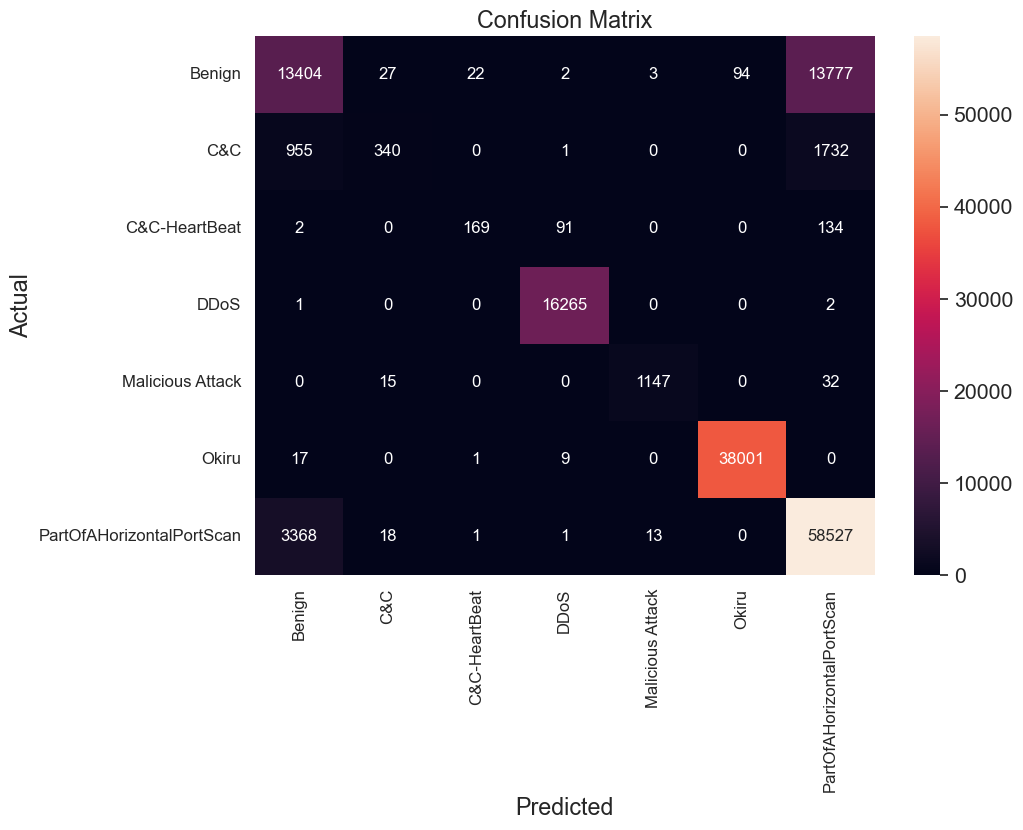

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


min_max_scaler = MinMaxScaler().fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

y_pred, y_test = ids(X_train, X_test, y_train, y_test)

In [8]:
X_train_reverted = min_max_scaler.inverse_transform(X_train)

In [9]:
X_train = to_df(X_train_reverted)

In [10]:
training_data = X_train
y_train = y_df(y_train)

training_data.insert(X_train.shape[1], 'label', y_train)
X_train = X_train.drop(columns=['label'])

In [11]:
from sklearn.metrics import f1_score

def sorter(data_df, y_test, y_pred):
    
    f1_scores = f1_score(y_test, y_pred, average=None)
    
    label_list = []
    labels = range(0,10)
    
    for (i, pos) in zip(f1_scores, labels):
        if i < 0.7:
            label_list.append(pos)
    print(label_list)
    
    
    data_gen = data_df[data_df['label'].isin(label_list)]
    
        
    return label_list


label_list = sorter(training_data, y_test, y_pred)


        

[0, 1, 2]


In [12]:
input_dimension = training_data.drop(columns=['label'])

In [13]:
def gan_system():
    
    def build_generator(n_columns, latent_dim):
        model = Sequential()
        model.add(Dense(16, kernel_initializer = "he_uniform", input_dim=latent_dim))
        model.add(LeakyReLU(0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(32,  kernel_initializer = "he_uniform"))
        model.add(LeakyReLU(0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(64,  kernel_initializer = "he_uniform"))
        model.add(LeakyReLU(0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(128,  kernel_initializer = "he_uniform"))
        model.add(LeakyReLU(0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(n_columns, activation = "sigmoid"))
        
        return model

    latent_dim = 12
    generator = build_generator(input_dimension.shape[1], latent_dim)

    optimizer = Adam(lr=0.0002, beta_1=0.5)

    def build_discriminator(inputs_n):
        model = Sequential()
        model.add(Dense(64,  kernel_initializer = "he_uniform", input_dim = inputs_n))
        model.add(LeakyReLU(0.2))
        model.add(Dense(32,  kernel_initializer = "he_uniform"))
        model.add(LeakyReLU(0.2))
        model.add(Dense(16,  kernel_initializer = "he_uniform"))
        model.add(LeakyReLU(0.2))
        model.add(Dense(8,  kernel_initializer = "he_uniform"))
        model.add(LeakyReLU(0.2))
        model.add(Dense(1, activation = "sigmoid"))
        model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
        
        return model

    discriminator = build_discriminator(input_dimension.shape[1])


    def build_gan(generator, discriminator):
        # make weights in the discriminator not trainable
        discriminator.trainable = False
        # connect generator and dicriminator
        model = Sequential()
        # add generator
        model.add(generator)
        # add the discriminator
        model.add(discriminator)
        # compile model
        model.compile(loss = "binary_crossentropy", optimizer = optimizer)
        
        return model


    gan = build_gan(generator, discriminator)
    
    return gan, generator, discriminator, latent_dim

def train(gan, generator, discriminator, data_real, latent_dim, k, n_epochs, n_batch, n_eval):
    
  
   
     
    
    
    #assign y from data_(df)
    data_label = data_real['label']

    #drop label column & scale back to numpy
    data = data_real.drop(columns=['label'])
    data = min_max_scaler.transform(data)
   
    
    #Half batch size for updateting discriminator
    half_batch = int(n_batch / 2)

    #lists for stats from the model
    generator_loss = []
    discriminator_loss = []
    
    #generate class labels for fake = 0 and real = 1
    valid = np.ones((half_batch, 1))
    fake = np.zeros((half_batch, 1))
    y_gan = np.ones((n_batch, 1))
    #training loop

    print(f'GAN training of label: {k}, samples = {data.shape[0]}')

    for j in range(n_epochs):

        #select random batch from the real numerical data
        idx = np.random.randint(0, data.shape[0], half_batch)
        real_data = data[idx]

        #generate fake samples from the noise
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_data = generator.predict(noise)

        #train the discriminator and return losses
        d_loss_real, _ = discriminator.train_on_batch(real_data, valid)
        d_loss_fake, _ = discriminator.train_on_batch(fake_data, fake)

        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        discriminator_loss.append(d_loss)

        #generate noise for generator input and  train the generator (to have the discriminator label samples as valid)
        noise = np.random.normal(0, 1, (n_batch, latent_dim))
        g_loss = gan.train_on_batch(noise, y_gan)
        generator_loss.append(g_loss)
        
        
        
        #evaluate progress
        if (j+1) % n_eval == 0:
            
            print ("Epoch: %d [Generator loss: %f] [Discriminator loss: %f]" % (j + 1, g_loss, d_loss))
            



    #plot losses after training
    plt.figure(figsize = (20, 10))
    plt.plot(generator_loss, label = "Generator loss")
    plt.plot(discriminator_loss, label = "Discriminator loss")
    plt.title(f"Stats from training GAN, label: {k}")
    plt.legend()
    plt.grid()
        

In [14]:
def ids_with_synthetic(X_train_gen, X_test_, y_train_gen, y_test_):

    input_shape = X_train.shape[1]
    model = tf.keras.models.Sequential([

                tf.keras.layers.Flatten(input_shape=(input_shape,)),
                tf.keras.layers.Dense(hidden(), activation='relu'),
                #tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(7, activation='softmax')
                ])

    model.compile(optimizer='adam',
         loss='sparse_categorical_crossentropy',
         metrics=['accuracy'])

    epoch = 10
    batch = 500

    model.fit(X_train_gen,
                y_train_gen,
                epochs=epoch,
                batch_size = batch)

    y_pred_ = model.predict_classes(X_test_, verbose=0)
    
    
    
    y_pred_ = labels(y_pred_)
    
    report = classification_report(y_test_, y_pred_, target_names = class_names)
    
    f1_scores = f1_score(y_test_, y_pred_, average=None)
    
    
    
    cross_tab = pd.crosstab(y_test_, y_pred_)
    con_matrix(cross_tab)
    
    print(report)
    
    return f1_scores, report

In [15]:
original_data = to_df(X_train)
original_labels = y_df(y_train)

In [16]:
num_to_gen = []

def to_100(num):
    val = 150000 - num
    return val 

for t in label_list:
    label_sel = original_labels.loc[original_labels['label'] == t].shape[0]
    amount = to_100(label_sel)
    num_to_gen.append(amount)
    

GAN training of label: 0, samples = 87450
Epoch: 250 [Generator loss: 2.352363] [Discriminator loss: 0.411293]
Epoch: 500 [Generator loss: 1.011084] [Discriminator loss: 0.618905]
Epoch: 750 [Generator loss: 0.716384] [Discriminator loss: 0.681269]
Epoch: 1000 [Generator loss: 0.726848] [Discriminator loss: 0.688116]
Epoch: 1250 [Generator loss: 0.718322] [Discriminator loss: 0.696243]
Epoch: 1500 [Generator loss: 0.704960] [Discriminator loss: 0.702623]
Epoch: 1750 [Generator loss: 0.707805] [Discriminator loss: 0.704605]
Epoch: 2000 [Generator loss: 0.706967] [Discriminator loss: 0.701555]
Epoch: 2250 [Generator loss: 0.711072] [Discriminator loss: 0.699586]
Epoch: 2500 [Generator loss: 0.710769] [Discriminator loss: 0.702328]
Epoch: 2750 [Generator loss: 0.715183] [Discriminator loss: 0.700852]
Epoch: 3000 [Generator loss: 0.723837] [Discriminator loss: 0.697927]
Epoch: 3250 [Generator loss: 0.705777] [Discriminator loss: 0.697940]
Epoch: 3500 [Generator loss: 0.702896] [Discriminat

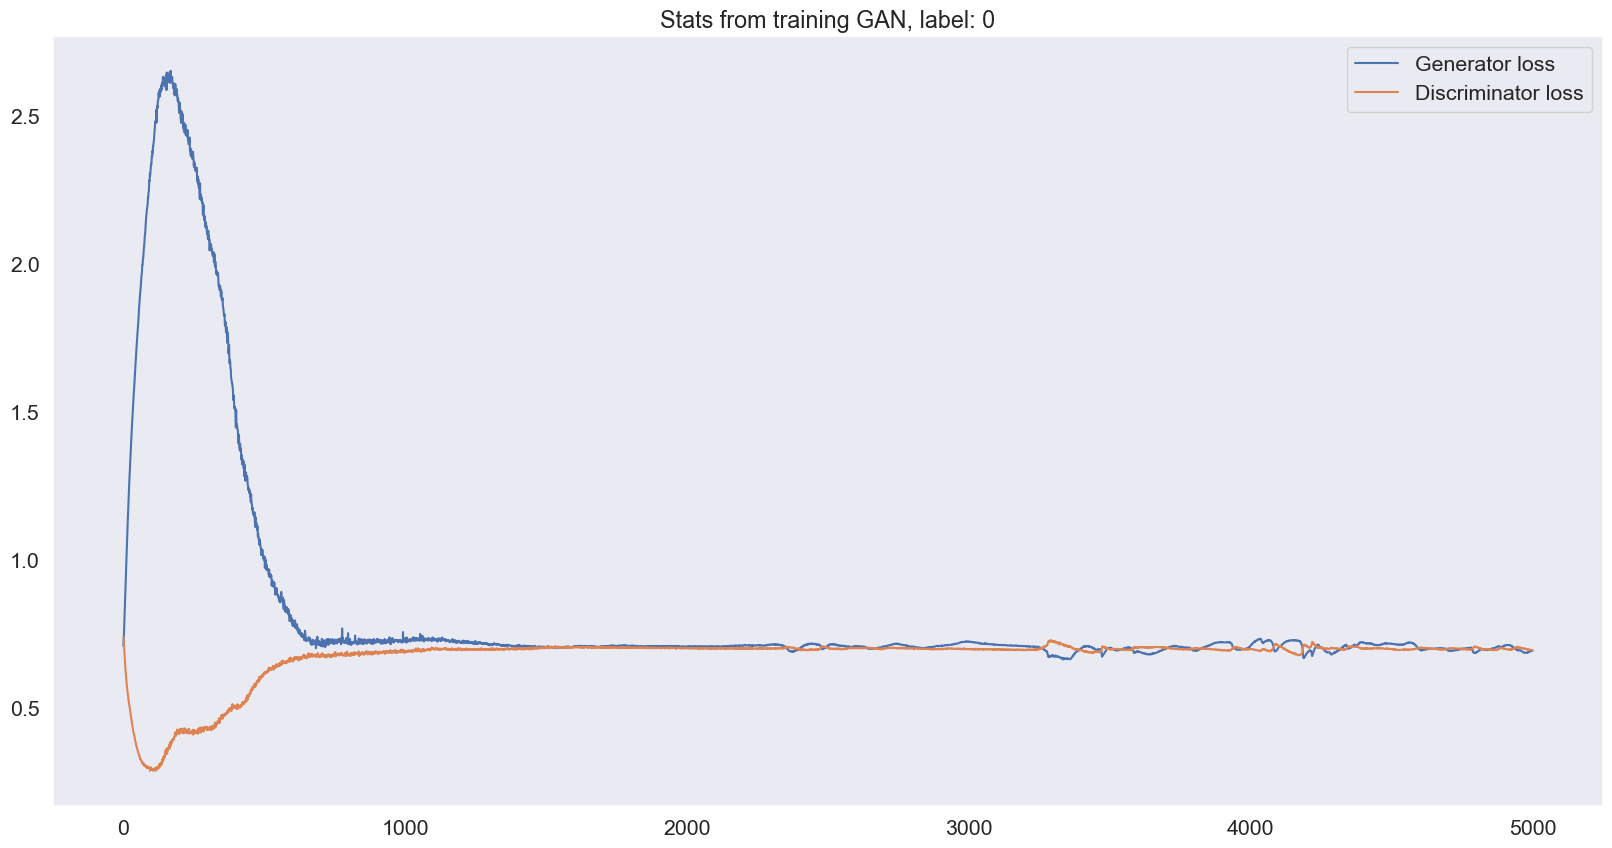

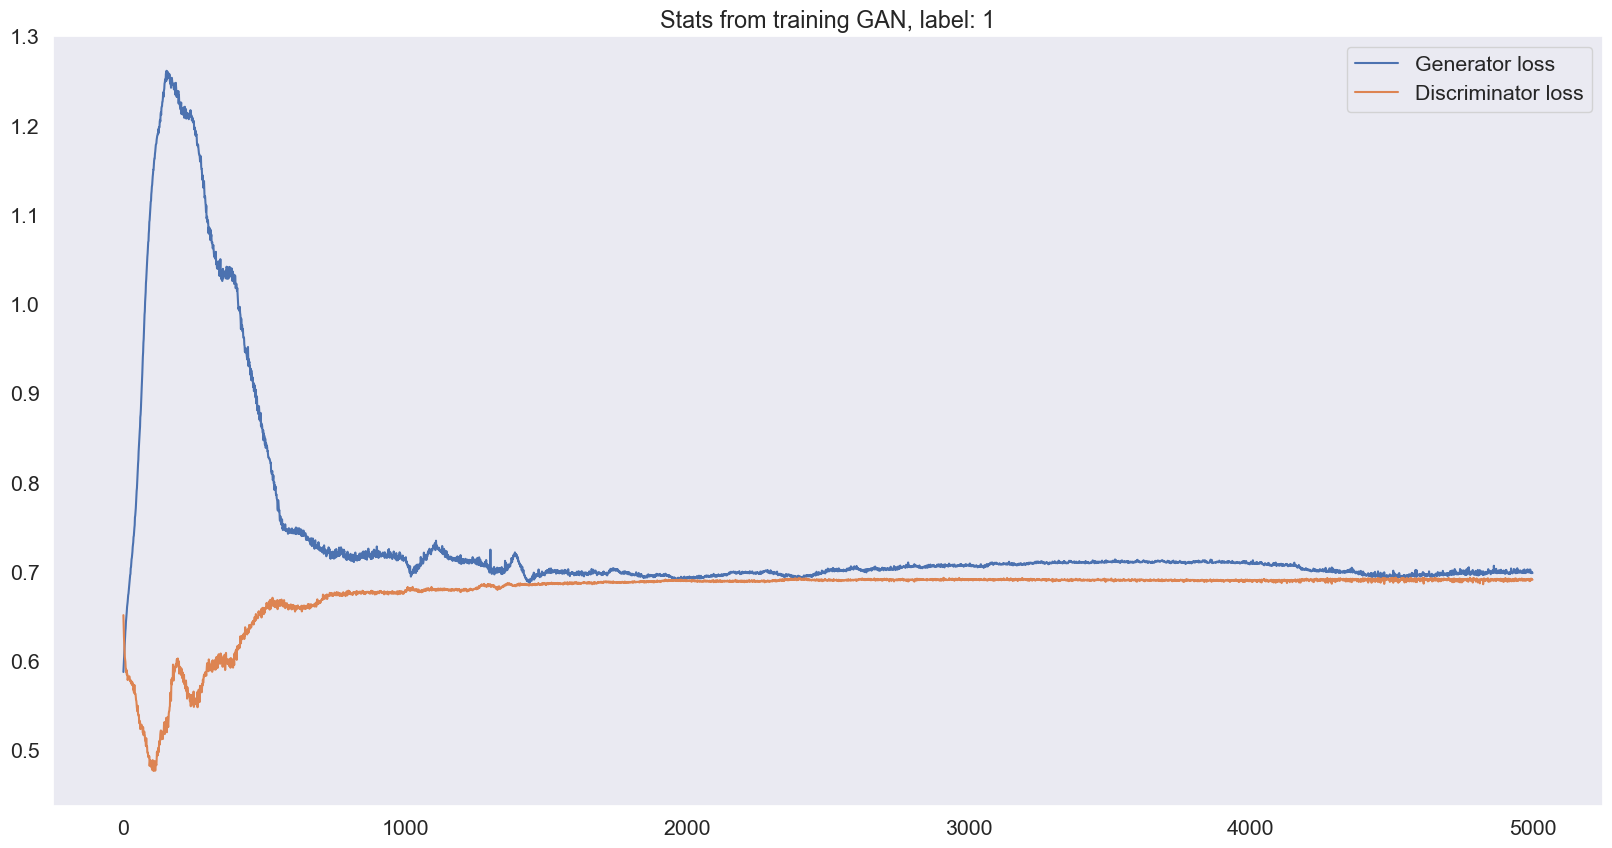

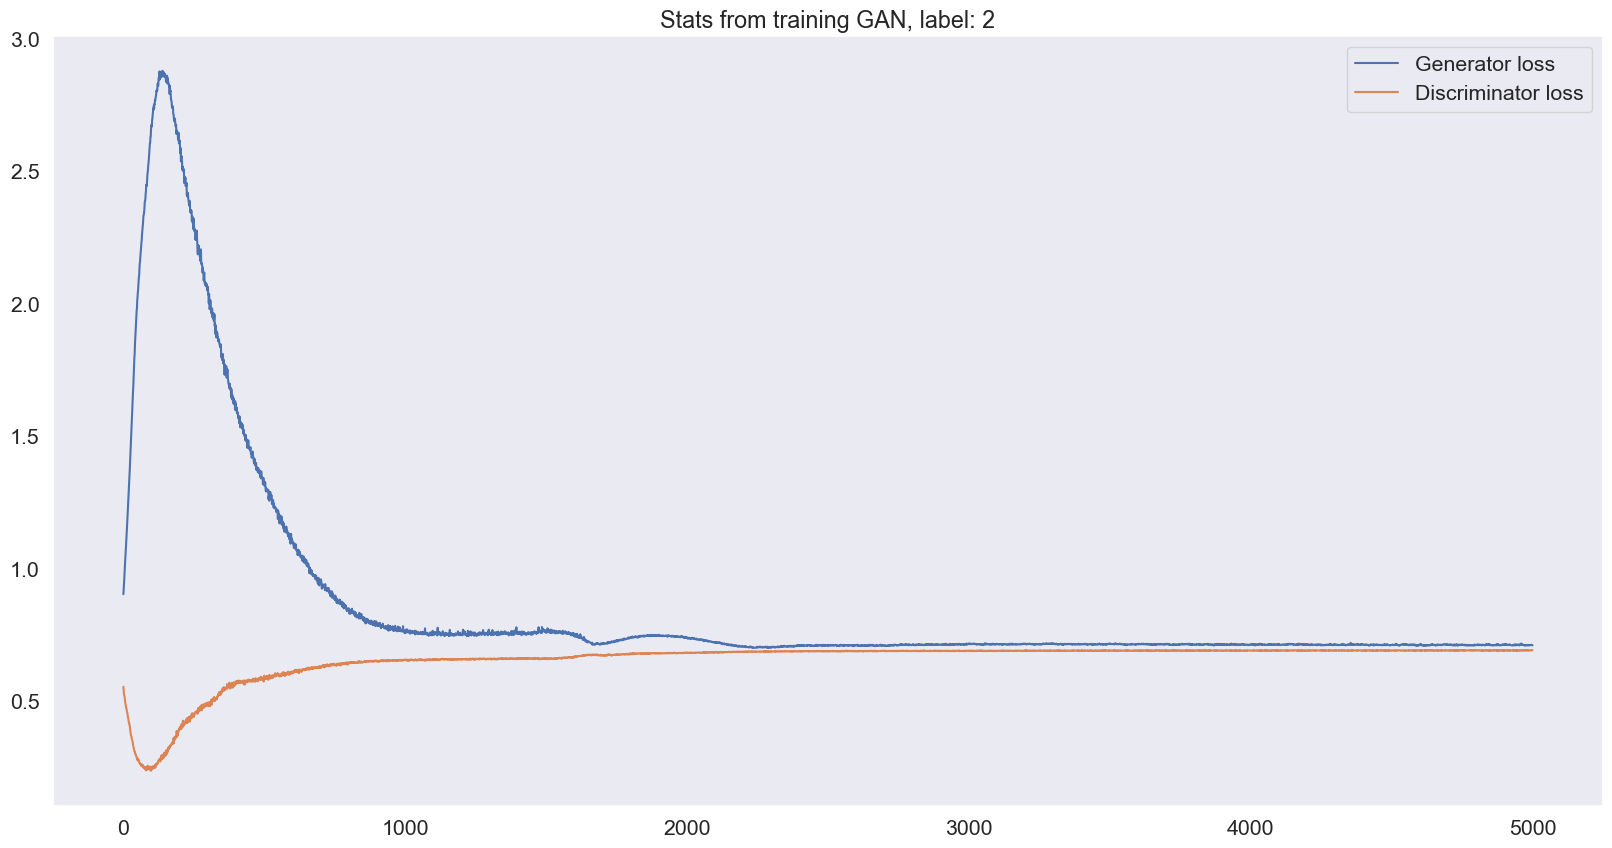

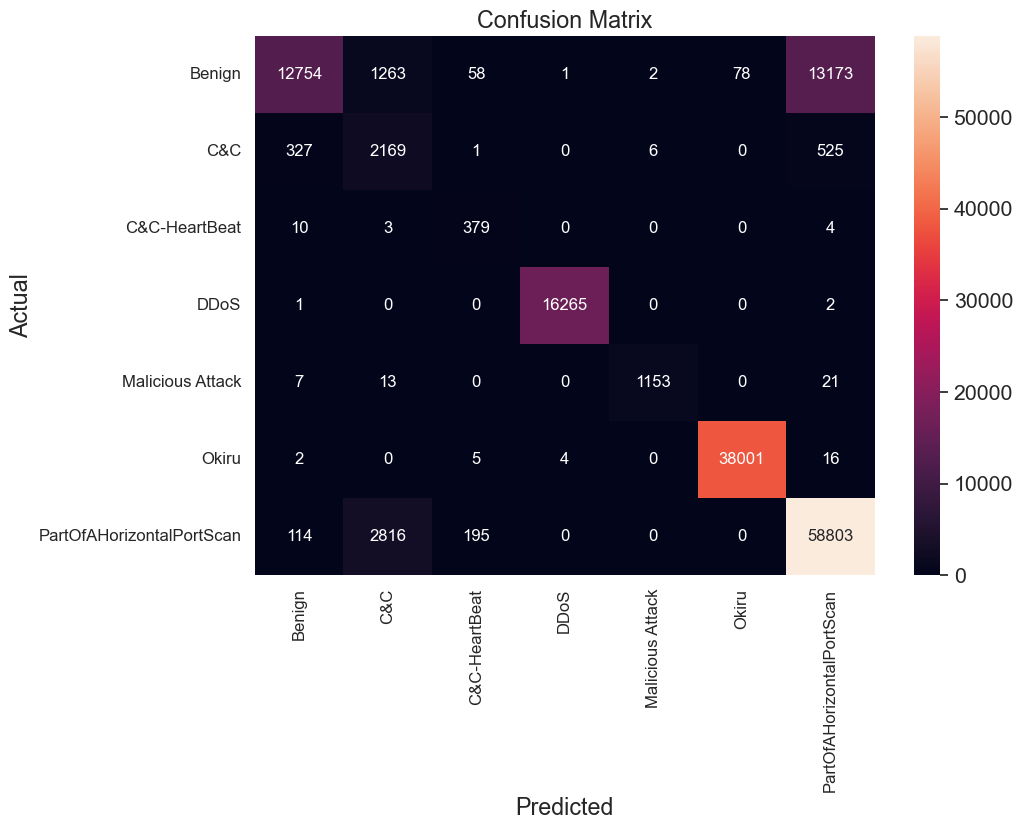

In [17]:
def percentage(percent, num):
    return int(percent * num)




fake_data=[]
fake_labels=[]

fake_data = to_df(fake_data)
fake_labels = y_df(fake_labels)


for k, g in zip(label_list, num_to_gen):
    
    real_data = training_data.loc[training_data['label'] == k]
    
    
    # randomly select 80% of real training data for gan trainining
    #this is different for all files, from 20% to 100% 
    real_data = real_data.sample(n = percentage(0.80,real_data.shape[0]))
    
    
    gan, generator, discriminator, latent_dim = gan_system()

    train(gan, generator, discriminator, real_data, latent_dim, k, n_epochs = 5000, 
                                         n_batch = 5000, n_eval = 250)
    
    
    noise = np.random.normal(0, 1, (g, latent_dim))
    gen_data = generator.predict(noise)

    generated_numerical_data = min_max_scaler.inverse_transform(gen_data)
    
    data_generated = to_df(generated_numerical_data)
    data_generated['label'] = k
    
    y_data = data_generated['label']
    X_data = data_generated.drop(columns=['label'])
    
    y_data = y_df(y_data)


    fake_data = fake_data.append(X_data, ignore_index=True)
    fake_labels = fake_labels.append(y_data, ignore_index=True)
    
    

original_data = original_data.astype('int32')   

y_train_hybrid = pd.concat([original_labels, fake_labels], ignore_index=True)
X_train_hybrid = pd.concat([original_data, fake_data], ignore_index=True)    

X_train_hybrid = X_train_hybrid.astype('int32')

hybrid_data = pd.concat([X_train_hybrid, y_train_hybrid], axis=1)

hybrid_data = hybrid_data.sample(frac=1).reset_index(drop=True)

y_train_hybrid = hybrid_data['label']
X_train_hybrid = hybrid_data.drop(columns=['label'])

X_train_hybrid = min_max_scaler.transform(X_train_hybrid)

y_train_hybrid = np.asarray(y_train_hybrid).astype(np.int32)

f1_scores, report = ids_with_synthetic(X_train_hybrid, X_test, y_train_hybrid, y_test)  

Epoch 1/10
1840/1840 [==============================] - 1s 420us/step - loss: 0.9699 - accuracy: 0.6265
Epoch 2/10
1840/1840 [==============================] - 1s 416us/step - loss: 0.6693 - accuracy: 0.7451
Epoch 3/10
1840/1840 [==============================] - 1s 417us/step - loss: 0.5300 - accuracy: 0.7907
Epoch 4/10
1840/1840 [==============================] - 1s 423us/step - loss: 0.4335 - accuracy: 0.8260
Epoch 5/10
1840/1840 [==============================] - 1s 420us/step - loss: 0.3940 - accuracy: 0.8361
Epoch 6/10
1840/1840 [==============================] - 1s 422us/step - loss: 0.3718 - accuracy: 0.8429
Epoch 7/10
1840/1840 [==============================] - 1s 421us/step - loss: 0.3568 - accuracy: 0.8561
Epoch 8/10
1840/1840 [==============================] - 1s 418us/step - loss: 0.3454 - accuracy: 0.8666
Epoch 9/10
1840/1840 [==============================] - 1s 425us/step - loss: 0.3351 - accuracy: 0.8720
Epoch 10/10
1840/1840 [==============================] - 1s 418u

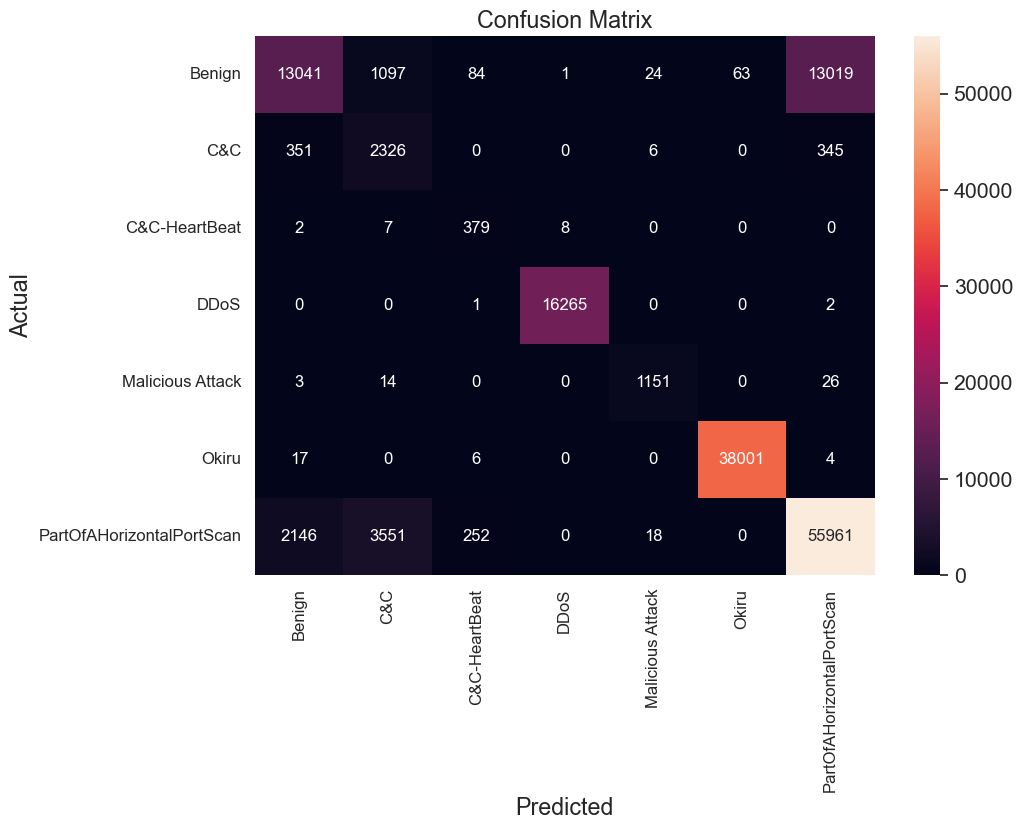

In [18]:
f1_scores, report = ids_with_synthetic(X_train_hybrid, X_test, y_train_hybrid, y_test)  